# Visualizations

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import statistics

from scipy import stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats import weightstats as stests

import warnings 
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("./Dataset/healthinsurance.csv")

In [7]:
df.head()

,age,Age_Category,sex,weight,bmi,BMI_Levels,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,job_title,claim
0,50,Above_Fifty,female,45,25.6,Over_Weight,NoDisease,0,No,Providence,84,Yes,Accountant,8932.1
1,52,Above_Fifty,female,90,37.5,Obese,NoDisease,2,No,Nashville,0,Yes,Engineer,33472.0
2,52,Above_Fifty,female,90,37.5,Obese,NoDisease,2,No,Springfield,0,Yes,Engineer,33472.0
3,52,Above_Fifty,female,90,37.5,Obese,NoDisease,2,No,WashingtonDC,0,Yes,Engineer,33472.0
4,52,Above_Fifty,female,90,37.5,Obese,NoDisease,2,No,Stamford,0,Yes,Engineer,33472.0


4a)
Provide a summary statistics of all the numerical variables, based on the summary which variable do you think has more variability.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,39.533067,13.829984,18.0,27.0,40.00,51.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,15000.0,30.262180,5.924629,16.0,25.9,29.80,34.100,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


In [9]:
print("The claim variable is more variable because of high std deviation")

The claim variable is more variable because of high std deviation


4b)
Provide a histogram for the variable bmi, based on histogram and calculation of mean, median and mode what would be the closest distribution shape you would suggest (use bin_size=20).

<Axes: xlabel='bmi', ylabel='Count'>

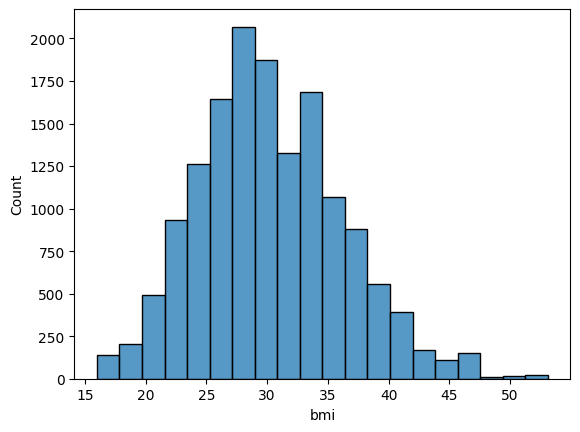

In [10]:
sns.histplot(data=df, x='bmi', bins=20)

In [11]:
df['bmi'].std()

5.924628685631208

In [12]:
df['bmi'].median()

29.8

In [13]:
print("Based on the above histogram and mean,median and std.\n\
This is not normal distribution. It is bimodal ditsribution")

Based on the above histogram and mean,median and std.
This is not normal distribution. It is bimodal ditsribution


4c)
Plot the boxplots for variable claim based on smoker, diabetes, sex. Based on these plots what do you observe and what do you conclude.

Text(0.5, 0, 'Diabetes')

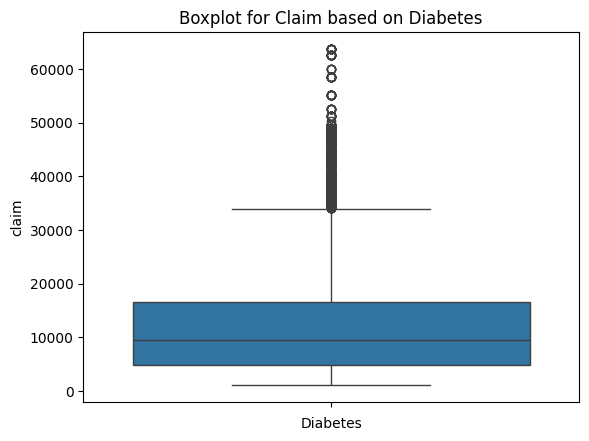

In [14]:
sns.boxplot(data=df, y='claim', x=df[df['hereditary_diseases']=='diabetes'])
plt.title("Boxplot for Claim based on Diabetes")
plt.xlabel("Diabetes")

Text(0.5, 0, 'Smoker')

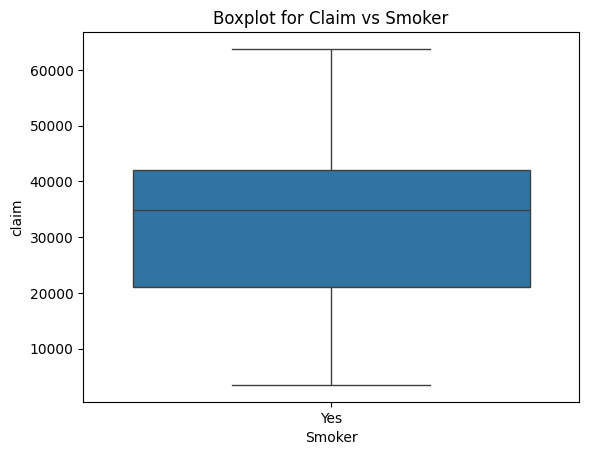

In [15]:
sns.boxplot(data=df[df['smoker']=='Yes'], y='claim', x='smoker')
plt.title("Boxplot for Claim vs Smoker")
plt.xlabel("Smoker")

Text(0.5, 1.0, 'Boxplot of Claim and Sex')

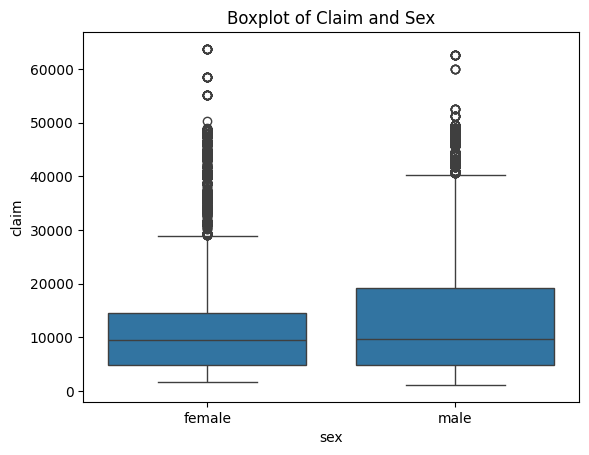

In [16]:
sns.boxplot(data=df, y='claim', x='sex')
plt.title("Boxplot of Claim and Sex")

4d)
Draw a scatter plot for all of the variables, what is your observation and conclusion for the relationship between age and claim charges, bmi and claim charges, would you prefer to further sub classify and develop a scatter plot, if yes or no why

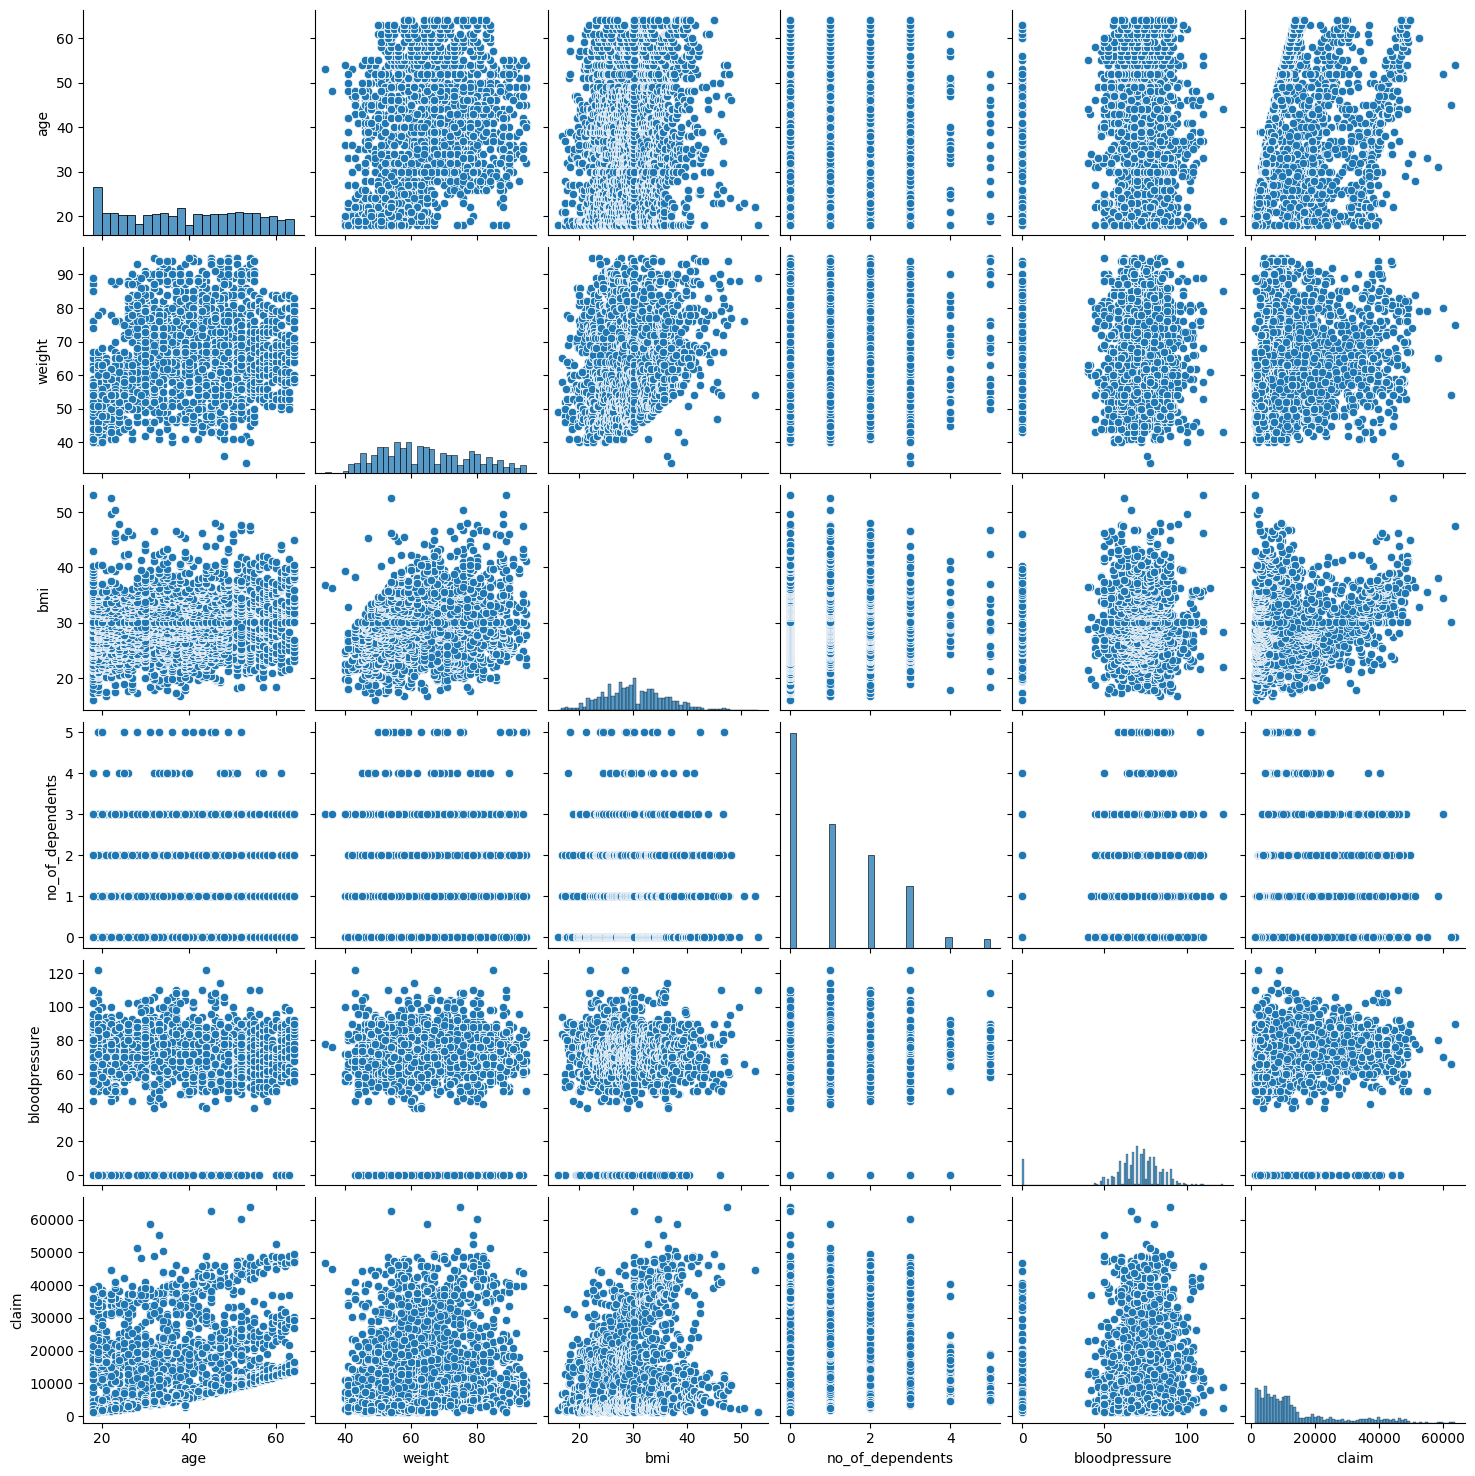

In [17]:
sns.pairplot(df)

In [18]:
print("Below are the observations from above pairplot,\n\
For age between 40 to 60 the claim amount is high,\n\
Claim values are high above bmi of 30\n\
Yes, I would like to understand the relationship of bmi and claim with smoker, hereditary_diseases")

Below are the observations from above pairplot,
For age between 40 to 60 the claim amount is high,
Claim values are high above bmi of 30
Yes, I would like to understand the relationship of bmi and claim with smoker, hereditary_diseases


# Hypothesis Testing

Consider the healthinsurance.csv file and answer the following questions. Assume normality of the variable Claim, conduct the following at a significance level
α = 0. 01

5a)
Perform a T test to compare whether smokers claim more than nonsmokers (use the complete data rather than random sampling of data, state the hypothesis and conclude accordingly)

In [19]:
# Defining the new dataset for Smokers and Non-Smokers
smokers=df[df['smoker']=='Yes']
non_smokers=df[df['smoker']=='No']

In [20]:
non_smokers.shape

(12028, 14)

In [21]:
smokers.shape

(2972, 14)

In [22]:
print("Hypothesis:")
print("H0: Average claim of smokers - Average cliam of non-smokers <=0  ")
print("H1: Average of claim of smokers - Average claim of non-smokers>0 (claim)\n")

print("It is a right tailed test two sample t test.")

#Given
alpha=0.01

print("\nLevene Test to check equality of variances:")

lavene_tval,lavene_pval=stats.levene(smokers['claim'],non_smokers['claim'])
print(f"Levene Test T Value {lavene_tval} and P value {lavene_pval}")

print("As the Leven Test P-vale < alpha 0.01, we can say the samples have unequal variances")

cv=stats.norm.isf(alpha)
print("\nCritical Value:",cv)

print("\nTest Value and P Value:")
t_val, p_val = stats.ttest_ind(smokers['claim'],non_smokers['claim'], equal_var=False )

print(f"Test Value {t_val} and P Value {p_val}")

print("\nDecision:")
print("The P value is less than alpha (0.01), therefore we can reject the Hypothesis H0")

print("\nSummary:")
print("We have enough evidence to support the claim that Average of claim of smokers - Average claim of non-smokers>0")




Hypothesis:
H0: Average claim of smokers - Average cliam of non-smokers <=0  
H1: Average of claim of smokers - Average claim of non-smokers>0 (claim)

It is a right tailed test two sample t test.

Levene Test to check equality of variances:
Levene Test T Value 3240.0942797019225 and P value 0.0
As the Leven Test P-vale < alpha 0.01, we can say the samples have unequal variances

Critical Value: 2.3263478740408408

Test Value and P Value:
Test Value 104.0322606388234 and P Value 0.0

Decision:
The P value is less than alpha (0.01), therefore we can reject the Hypothesis H0

Summary:
We have enough evidence to support the claim that Average of claim of smokers - Average claim of non-smokers>0


5 b)
Perform a T test to compare whether diabetics claim more than non diabetics (use the complete data rather than random sampling of data, state the hypothesis and conclude accordingly)

In [23]:
#Preare the datastet
diabetic = df[df['diabetes']=='Yes']['claim']
non_diabetic = df[df['diabetes']!='No']['claim']

In [24]:
print("Hypothesis:")
print("H0: Average Claim for Diabetics - Average Claim Non-Diabetics <= 0")
print("H1: Average Claim for Diabetics - Average Claim Non-Diabetics > 0 (claim)")
print("It is a two sample right tailed t test")


print("\n Check for unequal variances of the sample:")
levene_tval, levene_pval= stats.levene(diabetic,non_diabetic)
print(f"Levene Test T Value {levene_tval} and P value {levene_pval}")

print(f"\n As the P Value {levene_pval} > alpha {alpha}, therefore we can conclude that two samples have equal variances")

print("\nTest Value and P Value:")
tval,pval = stats.ttest_ind(diabetic,non_diabetic, equal_var=True)

print(f"Test Value {tval} and P Value {pval}")

print("\nDecision:")
print(f"As the P Value |{pval}| > alpha |{alpha}|, there we cannot reject the H0")

print("\nConclusion:")
print("We do not have enough evidence to the support the claim Average Claim for Diabetics - Average Claim Non-Diabetics > 0 (claim)")

Hypothesis:
H0: Average Claim for Diabetics - Average Claim Non-Diabetics <= 0
H1: Average Claim for Diabetics - Average Claim Non-Diabetics > 0 (claim)
It is a two sample right tailed t test

 Check for unequal variances of the sample:
Levene Test T Value 0.0 and P value 1.0

 As the P Value 1.0 > alpha 0.01, therefore we can conclude that two samples have equal variances

Test Value and P Value:
Test Value 0.0 and P Value 1.0

Decision:
As the P Value |1.0| > alpha |0.01|, there we cannot reject the H0

Conclusion:
We do not have enough evidence to the support the claim Average Claim for Diabetics - Average Claim Non-Diabetics > 0 (claim)


5 c) Conduct an ANOVA to compare between insurance charges of various age category and conclude accordingly (Assume of Equality of variance)

In [25]:
#Prepare dataset 
above_fifty=df[df['Age_Category']=='Above_Fifty']['claim']
middle=df[df['Age_Category']=='Middle']['claim']
youth=df[df['Age_Category']=='Youth']['claim']

print("Hypothesis:")
print("H0: All age catgeories have same claim charges ")
print("H1: Atleast one age catgeory has different claim charges (claim) ")

#Calculating the Critical Value

k=3
N=len(df)
dfD=k-1
dfN=N-k

cv=stats.f.isf(0.01, dfN, dfD)
print("\nCrtical Value:",cv)

#perform one way ANOVA
t_val,p_val=stats.f_oneway(above_fifty,middle,youth)

print(f"\nANOVA Test Results: Test Value {t_val} and P Value {p_val}")

print("\nDecision:")
print(f"As the P Value {p_val} < alpha {alpha}, therefore we can reject the H0")

print("\nSummary:")
print("We have enough evidence to support the claim that Atleast one age catgeory has different claim charges (claim)")


Hypothesis:
H0: All age catgeories have same claim charges 
H1: Atleast one age catgeory has different claim charges (claim) 

Crtical Value: 99.49909579412625

ANOVA Test Results: Test Value 598.081510690795 and P Value 1.2452783845775323e-250

Decision:
As the P Value 1.2452783845775323e-250 < alpha 0.01, therefore we can reject the H0

Summary:
We have enough evidence to support the claim that Atleast one age catgeory has different claim charges (claim)


5 d) Conduct an ANOVA to compare between insurance charges of various BMI_Levels and conclude accordingly (Assume of Equality of variance)

In [26]:
#Prepare the datasets
over_weight=df[df['BMI_Levels']=='Over_Weight']['claim']
obese=df[df['BMI_Levels']=='Obese']['claim']
normal=df[df['BMI_Levels']=='Normal']['claim']
under_weight=df[df['BMI_Levels']=='Under_Weight']['claim']


In [27]:
print("\nHypothesis:")
print("H0: All the BMI Levels have same average insurance claim charges")
print("H1: All the BMI Levels have same average insurance claim charges (claim)")

#Calculating Critical Value 
k=4
N=len(df)
dfN=k-1
dfD=N-k

cv = stats.f.isf(alpha,dfN,dfD)
print("\nCritical Value:",cv)

#Conduct oneway ANOVA
anova_tval,anova_pval=stats.f_oneway(over_weight,obese,normal,under_weight)
print(f"ANOVA Test Results: Test Value {anova_tval} and P Value {anova_pval}")

print("\nDecision:")
print(f"As P Value {anova_pval} < alpha {alpha}, therefore we reject H0")

print("\nConclusion:")
print("We have enough evidence to support the claim All the BMI Levels have same average insurance claim charges ")



Hypothesis:
H0: All the BMI Levels have same average insurance claim charges
H1: All the BMI Levels have same average insurance claim charges (claim)

Critical Value: 3.7829268848601365
ANOVA Test Results: Test Value 217.6743837716513 and P Value 3.1575298481554334e-138

Decision:
As P Value 3.1575298481554334e-138 < alpha 0.01, therefore we reject H0

Conclusion:
We have enough evidence to support the claim All the BMI Levels have same average insurance claim charges 


5 e) Conduct an Chi Square Test to compare between BMI_Levels and claim charges and conclude accordingly (Assume of Equality of variance)

In [28]:
print("\nHypothesis:")
print("H0: BMI Levels and Claim Charges are independent")
print("H1: BMI Levels and Claim Charges are dependent (claim)")

#Prepare the Crosstable
observed = pd.crosstab(df['BMI_Levels'],df['claim'])
observed



Hypothesis:
H0: BMI Levels and Claim Charges are independent
H1: BMI Levels and Claim Charges are dependent (claim)


claim,1121.9,1131.5,1135.9,1136.4,1137.0,1137.5,1141.5,1146.8,1149.4,1163.5,...,48970.3,49577.7,50386.0,51194.6,52590.8,55135.4,58571.1,60021.4,62592.9,63770.4
BMI_Levels,,,,,,,,,,,,,,,,,,,,,
Normal,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Obese,0,11,9,14,13,14,8,0,7,4,...,9,15,1,9,6,11,11,4,10,10
Over_Weight,0,0,0,0,0,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
Under_Weight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Create the values table
observed_value=observed.values
observed_value

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  9, ...,  4, 10, 10],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [30]:
#Rows and Columns
R=4
C=2054

#Degrees of Freedom
dof=(R-1)*(C-1)

#Critical Value
cv=chi2.isf(alpha,df=dof)

print("Critical Value = ", cv)


print("\nChi Square Test:")
t_val, pval, df, expected = chi2_contingency(observed_value, correction=False)

print(f"Test Value {t_val} and P Value {p_val}")

print("\nDecision:")
print(f"As P Value {p_val} < alpha {alpha} and \n\
Test value {t_val} > Critical Value {cv}, \n\
therefore we reject H0")

print("\nSummary:")
print("We have enough evidence to support the claim BMI Levels and Claim Charges are dependent")



Critical Value =  6420.130652136806

Chi Square Test:
Test Value 44991.45230922998 and P Value 1.2452783845775323e-250

Decision:
As P Value 1.2452783845775323e-250 < alpha 0.01 and 
Test value 44991.45230922998 > Critical Value 6420.130652136806, 
therefore we reject H0

Summary:
We have enough evidence to support the claim BMI Levels and Claim Charges are dependent


5 f) Conduct a Z score Test to check if average claim of males is higher than females.


In [31]:
#Prepare the dataset
male=df[df['sex']=='male']['claim']
female=df[df['sex']=='female']['claim']

print("\nHypothesis:")
print("H0: Average Claims for males <= Average claims for females (claim)")
print("H1: Average Claims for males > Average claims for females (claim)")

print("\nIt is right tail two sample z test")


cv = stats.norm.isf(alpha)

print("Critical Value:",cv)

#Find test value and p value 
test_val,p_val=stests.ztest(male,female,value=0,alternative='larger')

print(f"Z Test Results: Test Value {test_val} and P value {p_val}")

print("\nDecision:")
print(f"As P value {p_val} < alpha {alpha}, therefore will reject H0\n and Test value {test_val} > Critical Value {cv}, therefore will reject H0")

print("\nSummary:")
print("We have enough evidence to support the claim  Average Claims for males > Average claims for females")


TypeError: 'int' object is not subscriptable